In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:

# Assume your model depends on both the squared terms and the interaction terms
# Features: 6 samples, 2 variables
x = np.array([
    [1, 2],
    [2, 1],
    [3, 0],
    [1, 3],
    [2, 4],
    [0, 5]
])

# Targets (quadratic relationship: See image)
y = np.array([
    [9],
    [12],
    [19],
    [12],
    [21],
    [16]
])


In [19]:
# The first thing is to define the phi matrix and the initial weights
phi = np.array([[1,4,2,1,2,1],
              [4,1,2,2,1,1],
              [9,0,0,3,0,1],
              [1,9,3,1,3,1],
              [4,16,8,2,4,1],
              [0,25,0,0,5,1]])

y = np.array([
    [9],
    [12],
    [19],
    [12],
    [21],
    [16]
])

w = np.array([[1], [1], [1], [1], [1], [1]])

In [20]:
# Let's give the user the chance to enter the learning rate and the
# number of iterations
lr = float(input('Enter the learning rate\n'))
niter = int(input('Enter the number of iterations\n'))

In [21]:
loss_hist = [] # Recording the loss over iterations

In [22]:
weight_hist = [] # Recording the weights over iterations

In [23]:
# Determine the number of samples we have by extracting the number of rows
# of the phi matrix
ns = phi.shape[0]
print(f'Number of samples {ns}\n')

Number of samples 6



Below is the formula for the loss

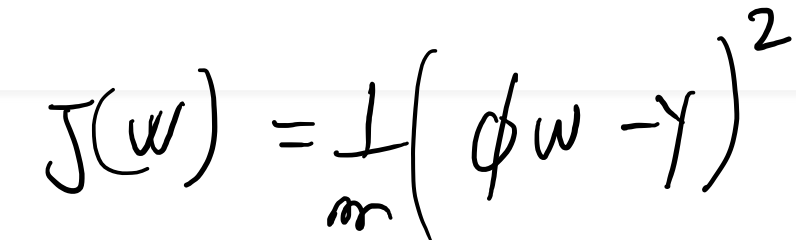

Below is the formula for the gradient
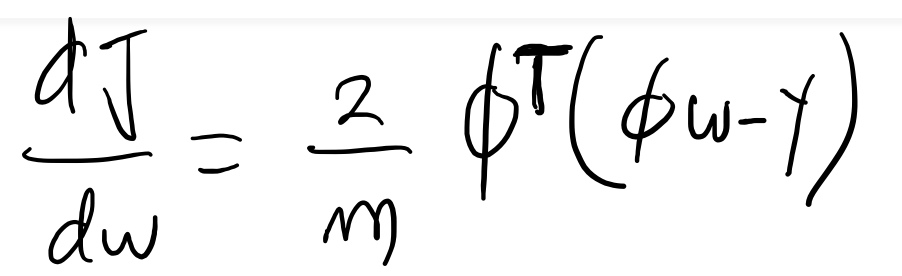

In [24]:
# Make the training loop. This is where we train the regression algorithm
for i in range(niter):
  loss = np.mean((phi @ w - y)**2)
  loss_hist.append(loss)

  # Let's calculate the gradient and update the weights
  gradient = (2/ns) * phi.T @ ((phi @ w - y))

  # Update weights
  w = w - lr * gradient

  # Store current weights
  weight_hist.append(w.flatten())

  # Print the loss every 10 iterations
  if i % 10 == 0:
    print(f"Iteration {i}, Loss: {loss}")



Iteration 0, Loss: 83.0
Iteration 10, Loss: 6.182860992860082
Iteration 20, Loss: 4.319233391779103
Iteration 30, Loss: 3.2469248319071435
Iteration 40, Loss: 2.558987581228936
Iteration 50, Loss: 2.081794673024984
Iteration 60, Loss: 1.7334356412531455
Iteration 70, Loss: 1.4711673205274678
Iteration 80, Loss: 1.2700592489563822
Iteration 90, Loss: 1.114050184418563
Iteration 100, Loss: 0.9920052918568097
Iteration 110, Loss: 0.8958356839128151
Iteration 120, Loss: 0.8195041098972
Iteration 130, Loss: 0.7584374796361306
Iteration 140, Loss: 0.7091444988746578
Iteration 150, Loss: 0.668948775885676
Iteration 160, Loss: 0.6357941611042051
Iteration 170, Loss: 0.6080991495702045
Iteration 180, Loss: 0.5846464806228544
Iteration 190, Loss: 0.5644988204771014


Remember that the predictions look like this
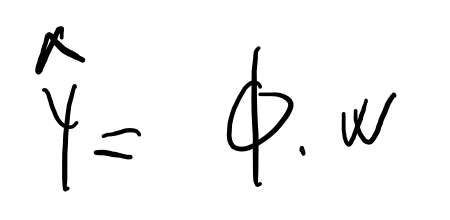

In [25]:
# Final weights and predictions
print("Final weights:")
print(w)
final_predictions = phi @ w # Remember that y = phi w
print("Final predictions:")
print(final_predictions)

Final weights:
[[1.56978961]
 [0.40209959]
 [0.25916914]
 [1.19694744]
 [0.93155095]
 [1.13967786]]
Final predictions:
[[ 7.89625345]
 [11.66472003]
 [18.85862672]
 [11.09747148]
 [22.04588154]
 [15.84992231]]


In [26]:
# Convert weight history to a numpy array for plotting
weight_history = np.array(weight_hist) # It was a list now it's an array, so I can plot it
weight_history.shape
# print(weight_history)

(200, 6)

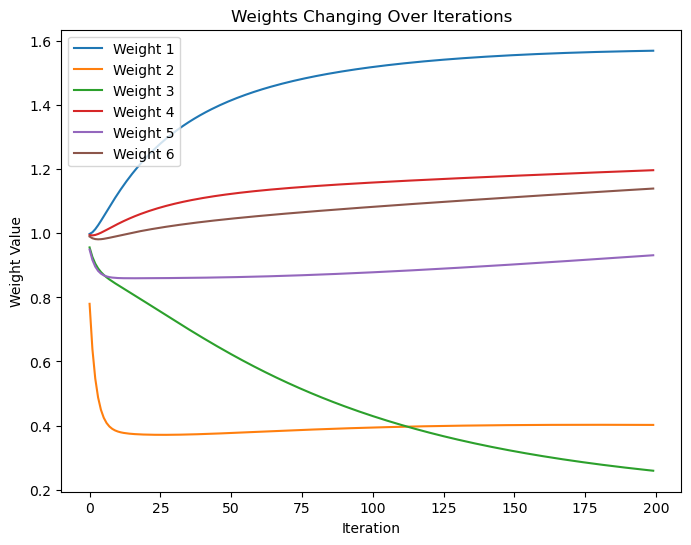

In [27]:
# Plot the weights changing with iterations
plt.figure(figsize=(8, 6))
# Here we're plotting both w1, w2 and w3, and seeing how they change with the number of
# iterations
for i in range(weight_history.shape[1]):
    plt.plot(range(niter), weight_history[:, i], label=f'Weight {i + 1}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weights Changing Over Iterations')
plt.legend()
# plt.grid(True)
plt.show()

In [28]:
# # -------- Plot features vs targets --------
# # Feature is phi[:,0] (the first column, not the bias)
# x = phi[:, 0]
# y_true = y.flatten()
# y_pred = final_predictions.flatten()

# plt.figure(figsize=(6, 5))
# plt.scatter(x, y_true, color='blue', label='Targets (y)')
# plt.plot(x, y_pred, color='red', label='Model prediction')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.title('Feature vs Target with Fitted Line')
# plt.legend()
# plt.show()

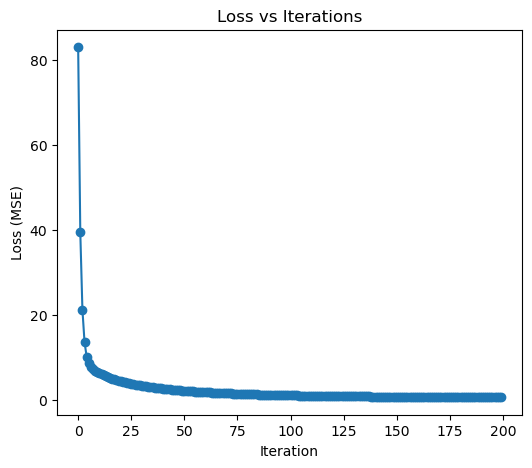

In [29]:
# ---- Plot loss over iterations ----
plt.figure(figsize=(6, 5))
plt.plot(range(niter), loss_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.show()

Remember that the closed-form solution looks like this

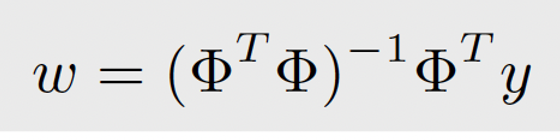

In [30]:
# Now using the closed-form solution

first = phi.T @ phi
second = np.linalg.inv(first)
third = phi.T @ y
w_cl = second @ third

In [31]:
# Final weights and predictions
print("Exact weights:")
print(w_cl)
y_closed = phi @ w_cl
print("Closed_form results:")
print(y_closed)
# print(y_pred)
# print(y_true)


Exact weights:
[[ 2.00000000e+00]
 [-4.61852778e-14]
 [-2.87769808e-13]
 [ 5.25801624e-12]
 [ 3.00000000e+00]
 [ 1.00000000e+00]]
Closed_form results:
[[ 9.]
 [12.]
 [19.]
 [12.]
 [21.]
 [16.]]


In [32]:
print(phi[:,0].shape, y.shape, y_closed.shape)
print(phi[:,0].shape, y.flatten().shape, y_closed.flatten().shape)

(6,) (6, 1) (6, 1)
(6,) (6,) (6,)


In [33]:
# # -------- Plot features vs targets vs closed-form--------
# # Feature is phi[:,0] (the first column, not the bias)
# x = phi[:, 0]
# y_true = y.flatten()
# y_pred = final_predictions.flatten()
# y_closed = y_closed.flatten()

# plt.figure(figsize=(6, 5))
# plt.scatter(x, y_true, color='blue', label='Targets (y)')
# plt.plot(x, y_pred, color='red', label='Model prediction')
# plt.plot(x, y_closed, color='green', label='Closed-form prediction')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.title('Feature vs Target with Fitted Line')
# plt.legend()
# plt.show()